## Initial Local Creation of Bayesian Network

## HC + BIC

The experimentation and testing of the initial simple Bayesian Network on a smaller dataset for testing

In [1]:
import pgmpy
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
import sys
sys.path.insert(0,"..")
from Data.DataPreprocessing import DataPreprocessing as myData
from pgmpy import estimators
from pgmpy.inference import VariableElimination
from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_score, recall_score, roc_auc_score, balanced_accuracy_score
from pgmpy.metrics import correlation_score, log_likelihood_score, structure_score


c:\Users\zachs\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data importing and preprocessing

In [2]:
loaded_data = myData.load_data()

#display(loaded_data)
data = myData.preprocess_data(loaded_data)
train_data, validation_data, test_data = myData.split_data(data,num_rows = 1000)

feature_states = myData.get_feature_states(data)
display(data)

c:\Users\zachs\Documents\CSHons\ResearchReport\Research_Code\Honours-Research\HC_differentScores\..\Data\DataPreprocessing.py:14: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../Data/accepted_2007_to_2018Q4.csv", engine='c')
c:\Users\zachs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:278: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
c:\Users\zachs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:278: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
c:\Users\zachs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(esti

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,"(961.0, 8800.0]",36 months,"(10.446, 15.582]","(5.898, 350.054]",C,10+ years,MORTGAGE,0.0,Not Verified,2015,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,"(24400.0, 32200.0]",36 months,"(10.446, 15.582]","(692.498, 1034.942]",C,10+ years,MORTGAGE,0.0,Not Verified,2015,...,0.0,4.0,0.0,0.0,0.0,1.0,3.0,N,Cash,N
2,"(16600.0, 24400.0]",60 months,"(10.446, 15.582]","(350.054, 692.498]",B,10+ years,MORTGAGE,0.0,Not Verified,2015,...,0.0,4.0,2.0,0.0,0.0,0.0,0.0,N,Cash,N
4,"(8800.0, 16600.0]",60 months,"(20.718, 25.854]","(5.898, 350.054]",F,3 years,MORTGAGE,0.0,Source Verified,2015,...,1.0,4.0,3.0,0.0,0.0,2.0,1.0,N,Cash,N
5,"(8800.0, 16600.0]",36 months,"(10.446, 15.582]","(350.054, 692.498]",C,4 years,RENT,0.0,Source Verified,2015,...,0.0,4.0,4.0,0.0,0.0,0.0,0.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,"(16600.0, 24400.0]",60 months,"(5.284, 10.446]","(350.054, 692.498]",B,5 years,OWN,1.0,Not Verified,2016,...,0.0,4.0,1.0,0.0,0.0,1.0,0.0,N,Cash,N
2260690,"(24400.0, 32200.0]",60 months,"(10.446, 15.582]","(350.054, 692.498]",C,9 years,MORTGAGE,1.0,Not Verified,2016,...,0.0,4.0,2.0,0.0,0.0,2.0,2.0,N,Cash,N
2260691,"(24400.0, 32200.0]",60 months,"(10.446, 15.582]","(692.498, 1034.942]",C,3 years,MORTGAGE,1.0,Source Verified,2016,...,0.0,4.0,0.0,0.0,0.0,2.0,0.0,N,Cash,N
2260692,"(8800.0, 16600.0]",60 months,"(10.446, 15.582]","(350.054, 692.498]",C,10+ years,RENT,1.0,Not Verified,2016,...,0.0,3.0,2.0,1.0,0.0,1.0,0.0,N,Cash,N


### Structure Learning

In [3]:
scoring_method = estimators.BicScore(data=train_data)
est = estimators.HillClimbSearch(data=train_data, use_cache = True)
estimated_model = est.estimate(
    scoring_method=scoring_method, max_iter=int(1e3))

model = pgmpy.models.BayesianNetwork(estimated_model.edges())
model.add_nodes_from(estimated_model.nodes())



  7%|▋         | 69/1000 [00:20<04:35,  3.38it/s] 


88
59
['loan_amnt', 'installment', 'total_rec_int', 'term', 'int_rate', 'initial_list_status', 'grade', 'home_ownership', 'mort_acc', 'loan_status', 'recoveries', 'last_fico_range_high', 'debt_settlement_flag', 'total_rec_late_fee', 'dti', 'application_type', 'open_acc', 'num_op_rev_tl', 'revol_util', 'all_util', 'fico_range_high', 'total_acc', 'num_il_tl', 'total_pymnt', 'last_pymnt_amnt', 'tot_cur_bal', 'avg_cur_bal', 'annual_inc', 'open_il_12m', 'open_il_24m', 'num_tl_op_past_12m', 'mo_sin_rcnt_tl', 'total_bal_il', 'open_rv_12m', 'open_acc_6m', 'max_bal_bc', 'total_rev_hi_lim', 'total_bc_limit', 'revol_bal', 'inq_last_12m', 'inq_fi', 'mths_since_recent_inq', 'acc_open_past_24mths', 'open_rv_24m', 'bc_open_to_buy', 'percent_bc_gt_75', 'bc_util', 'mo_sin_rcnt_rev_tl_op', 'mths_since_recent_bc', 'inq_last_6mths', 'num_actv_bc_tl', 'num_bc_sats', 'num_actv_rev_tl', 'num_bc_tl', 'num_tl_120dpd_2m', 'num_rev_accts', 'open_act_il', 'total_bal_ex_mort', 'verification_status']


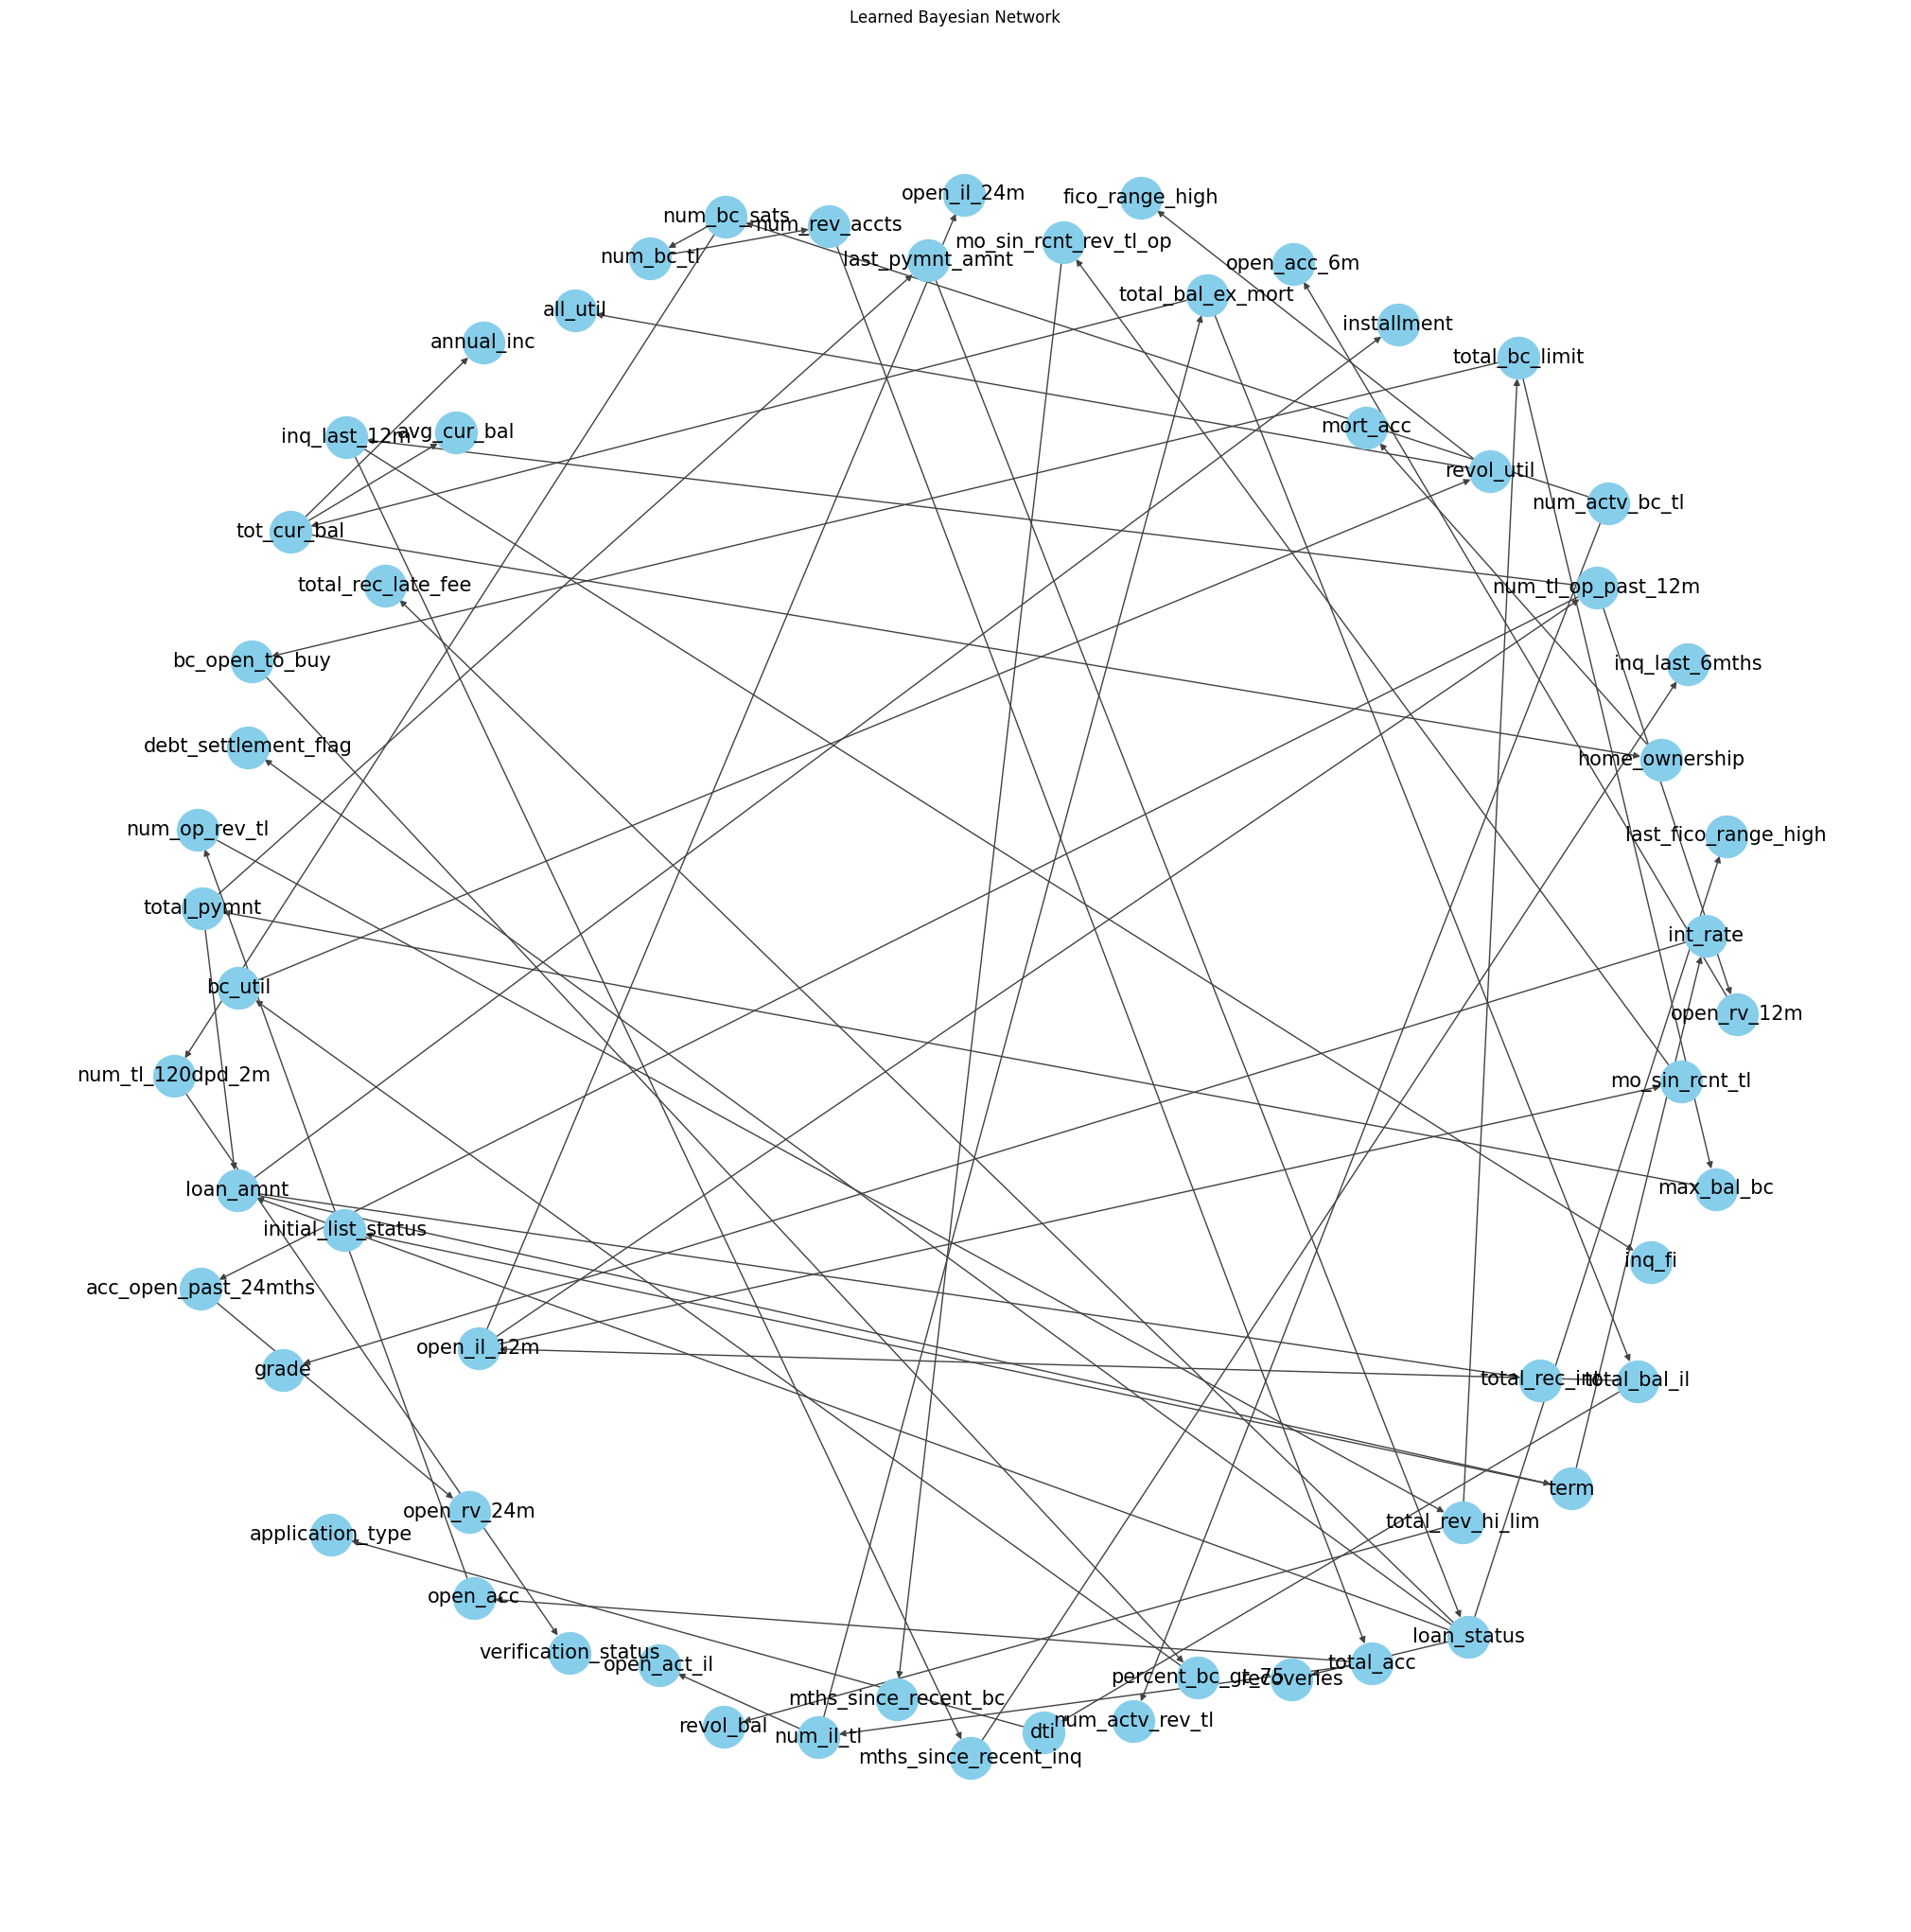

In [4]:
active_trail_nodes = model.active_trail_nodes('loan_status')['loan_status']
active_trail_nodes_list = list(active_trail_nodes)
original_nodes = list(model.nodes())
for node in original_nodes:
    if node not in active_trail_nodes_list:
        model.remove_node(node)
print(len(feature_states))
print(len(model.nodes()))
print(model.nodes())

nx_graph = nx.DiGraph(model.edges())
pos = nx.spring_layout(nx_graph,2)
plt.figure(figsize=(20, 20))
nx.draw(nx_graph, pos, with_labels=True, node_size=1000, node_color = 'skyblue', edge_color='#424242',font_size=15,font_color='black')
plt.title('Learned Bayesian Network')
plt.show()

###  Parameter Estimation

In [5]:
parameter_estimator = estimators.BayesianEstimator(model,train_data, state_names = feature_states)
parameters = parameter_estimator.get_parameters(n_jobs=6)

for i in range(len(parameters)):
    model.add_cpds(parameters[i])
    #print(parameters[i])

model.states

{'loan_amnt': ['(961.0, 8800.0]',
  '(24400.0, 32200.0]',
  '(16600.0, 24400.0]',
  '(8800.0, 16600.0]',
  '(32200.0, 40000.0]'],
 'loan_status': ['Fully Paid', 'Charged Off'],
 'total_pymnt': ['0.0', '3.0', '2.0', '1.0', '4.0'],
 'installment': ['(5.898, 350.054]',
  '(692.498, 1034.942]',
  '(350.054, 692.498]',
  '(1034.942, 1377.386]',
  '(1377.386, 1719.83]'],
 'total_rec_int': ['0.0', '1.0', '2.0', '3.0', '4.0'],
 'term': [' 36 months', ' 60 months'],
 'int_rate': ['(10.446, 15.582]',
  '(20.718, 25.854]',
  '(5.284, 10.446]',
  '(15.582, 20.718]',
  '(25.854, 30.99]'],
 'initial_list_status': ['w', 'f'],
 'grade': ['C', 'B', 'F', 'A', 'E', 'D', 'G'],
 'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE'],
 'tot_cur_bal': ['1.0', '2.0', '0.0', '3.0', '4.0'],
 'mort_acc': ['0.0', '1.0', '2.0', '3.0', '4.0'],
 'last_pymnt_amnt': ['0.0', '2.0', '1.0', '3.0', '4.0'],
 'recoveries': ['0.0', '1.0', '3.0', '2.0', '4.0'],
 'last_fico_range_high': ['(510.0, 680.0]',
  '(680.0, 850.

### Evidence lists

In [6]:
advanced_evidence_features =  ["annual_inc", "emp_length", "grade", "home_ownership", "verification_status", "last_fico_range_high", "fico_range_high", "purpose", "dti", "application_type", "delinq_2yrs", "avg_cur_bal", "tot_cur_bal", "pub_rec_bankruptcies", "mort_acc", "num_il_tl", "num_rev_accts", "total_bal_ex_mort", "revol_bal", "num_actv_rev_tl","num_op_rev_tl","max_bal_bc","total_rev_hi_lim","total_bal_il","open_acc","total_acc","tax_liens","pub_rec","num_bc_tl","earliest_cr_line","pct_tl_nvr_dlq","acc_now_delinq","revol_util","all_util","bc_util","total_cu_tl","total_bc_limit","num_actv_bc_tl","num_bc_sats","percent_bc_gt_75","num_tl_30dpd","num_tl_90g_dpd_24m","num_tl_120dpd_2m","num_accts_ever_120_pd"]

all_customer_info_evidence_features =  ["annual_inc", "emp_length", "grade", "home_ownership", "verification_status", "last_fico_range_high", "fico_range_high", "purpose", "dti", "application_type", "delinq_2yrs", "avg_cur_bal", "tot_cur_bal", "pub_rec_bankruptcies", "mort_acc", "num_il_tl", "num_rev_accts", "total_bal_ex_mort", "revol_bal", "num_actv_rev_tl","num_op_rev_tl","max_bal_bc","total_rev_hi_lim","total_bal_il","open_acc","total_acc","tax_liens","pub_rec","num_bc_tl","earliest_cr_line","pct_tl_nvr_dlq","acc_now_delinq","revol_util","all_util","bc_util","total_cu_tl","total_bc_limit","num_actv_bc_tl","num_bc_sats","percent_bc_gt_75","num_tl_30dpd","num_tl_90g_dpd_24m","num_tl_120dpd_2m","num_accts_ever_120_pd","open_il_12m","open_il_24m","num_tl_op_past_12m","open_acc_6m","acc_open_past_24mths","open_rv_12m","open_rv_24m","mo_sin_rcnt_tl","mths_since_recent_bc","mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","mo_sin_old_il_acct","mths_since_recent_inq","inq_fi","inq_last_6mths","inq_last_12m","title","bc_open_to_buy"]

difference = list(set(model.nodes()) - set(all_customer_info_evidence_features))
print(difference)

['loan_status', 'term', 'open_act_il', 'total_rec_int', 'initial_list_status', 'total_pymnt', 'installment', 'total_rec_late_fee', 'int_rate', 'recoveries', 'last_pymnt_amnt', 'debt_settlement_flag', 'loan_amnt']


### Inference

In [7]:
def performInference(target_label_list, val_test_data):
    removed_attributes = set()
    y_pred = []
    y_true = []    
    validation_evidence_list = myData.get_evidence_list(val_test_data, target_label_list=target_label_list)
    inference = VariableElimination(model)
    for i in range(len(validation_evidence_list)):
        for attribute in list(validation_evidence_list[i].keys()):
            if attribute not in model.nodes():
                removed_attributes.add(attribute)
                del validation_evidence_list[i][attribute]
    print(removed_attributes)            
    for i in range(len(validation_evidence_list)):
        target_variables_result = inference.map_query(target_label_list, evidence = validation_evidence_list[i], show_progress= False) 
        #print(target_variables_result)
        #print(val_test_data[target_label_list].iloc[i].to_dict())
        y_pred.append(target_variables_result)
        y_true.append(val_test_data[target_label_list].iloc[i].to_dict())
    
    return y_pred, y_true
  
loan_structure_target_list = ["int_rate","term","installment"]    
y_pred, y_true = performInference(loan_structure_target_list, validation_data)    


{'purpose', 'delinq_2yrs', 'pub_rec_bankruptcies', 'emp_length'}


In [8]:
for record in zip(y_pred,y_true):
    print("\nNEW RECORD:\n")
    print("predicted:\n")
    print(record[0])
    print("\nTrue:\n")
    print(record[1])
    print("\n")
    print("#####################")


NEW RECORD:

predicted:

{'installment': '(350.054, 692.498]', 'term': ' 36 months', 'int_rate': '(15.582, 20.718]'}

True:

{'int_rate': '(20.718, 25.854]', 'term': ' 36 months', 'installment': '(1034.942, 1377.386]'}


#####################

NEW RECORD:

predicted:

{'installment': '(350.054, 692.498]', 'term': ' 36 months', 'int_rate': '(5.284, 10.446]'}

True:

{'int_rate': '(5.284, 10.446]', 'term': ' 36 months', 'installment': '(5.898, 350.054]'}


#####################

NEW RECORD:

predicted:

{'installment': '(350.054, 692.498]', 'term': ' 36 months', 'int_rate': '(10.446, 15.582]'}

True:

{'int_rate': '(10.446, 15.582]', 'term': ' 60 months', 'installment': '(5.898, 350.054]'}


#####################

NEW RECORD:

predicted:

{'installment': '(350.054, 692.498]', 'term': ' 60 months', 'int_rate': '(25.854, 30.99]'}

True:

{'int_rate': '(25.854, 30.99]', 'term': ' 60 months', 'installment': '(692.498, 1034.942]'}


#####################

NEW RECORD:

predicted:

{'installme

## Testing

### Log-Likelihood

#### Log-likelihood of Data

##### log-likelihood of just the full distribution sampled

In [9]:
import numpy as np
from pgmpy.inference import ApproxInference

def expected_log_likelihood_discrete(samples, P_tilde_log_prob, probs):

    log_likelihoods = []
    for index, sample in samples.iterrows():
        log_likelihoods.append(P_tilde_log_prob(sample, probs))
    return np.mean(np.array(log_likelihoods))
#
## Example usage:
#
## Step 1: Define P̃'s log probability function
def P_tilde_log_prob(x, probs):
    #probs.get_value(int_rate=x.loc["int_rate"], term=x.loc["term"], installment =x.loc["installment"], disbursement_method = x.loc["disbursement_method"])
    print(probs)
    return np.log(probs.get_value(int_rate=x.loc["int_rate"], term=x.loc["term"], installment =x.loc["installment"], disbursement_method = x.loc["disbursement_method"]))  



difference = list(set(validation_data.columns) - set(model.nodes()))
missing_features = []
for missing_feature in difference:
    missing_features.append(missing_feature)
    
val_data_removed_missing_features = validation_data.drop(missing_features, axis=1, inplace=False)


infer = ApproxInference(model)
predicted_prob_distribution = infer.query(variables = val_data_removed_missing_features.columns.to_list() , n_samples = 2 , state_names = feature_states)


expected_ll = expected_log_likelihood_discrete(val_data_removed_missing_features, P_tilde_log_prob)
print(f"Expected log-likelihood: {expected_ll}")

expected_ll = expected_log_likelihood_discrete(val_data_removed_missing_features, P_tilde_log_prob, predicted_prob_distribution)
print(f"Expected log-likelihood of distribution of model: {expected_ll}")


Generating for node: grade: 100%|██████████| 59/59 [00:00<00:00, 810.91it/s]    


MemoryError: 

##### log-likelihood of specifacally the P( loan structure | customer's info, loan_status = fully_paid)

In [10]:
import numpy as np

# i have no idea if thse functions are right at all, i got chatGPT to do them because i weas confused, i dont trust them but dont understand it well enough to code it myself persay.

def expected_log_likelihood_discrete(samples, P_tilde_log_prob, probs):
    """
    Computes the expected log-likelihood for discrete distributions
    
    Parameters:
    - samples: an array of samples drawn from the distribution P*
    - P_tilde_log_prob: a function that computes the log probability of a sample under P̃
    
    Returns:
    - The expected log-likelihood
    """
    log_likelihoods = []
    for index, sample in samples.iterrows():
        log_likelihoods.append(P_tilde_log_prob(sample, probs))
    #log_likelihoods = np.array([P_tilde_log_prob(sample, probs) for sample in samples])
    return np.mean(np.array(log_likelihoods))
#
## Example usage:
#
## Step 1: Define P̃'s log probability function
def P_tilde_log_prob(x, probs):
    #print(probs.get_value(int_rate=x.loc["int_rate"], term=x.loc["term"], installment =x.loc["installment"], disbursement_method = x.loc["disbursement_method"]))
    return np.log(probs.get_value(int_rate=x.loc["int_rate"], term=x.loc["term"], installment =x.loc["installment"], disbursement_method = x.loc["disbursement_method"]))  # log(0) is undefined, so we use a small value for missing keys




from pgmpy.inference import ApproxInference

difference = list(set(validation_data.columns) - set(model.nodes()))
missing_features = []
for missing_feature in difference:
    missing_features.append(missing_feature)
    
val_data_removed_missing_features = validation_data.drop(missing_features, axis=1, inplace=False)

loan_structure_target_list = ["int_rate","term","installment","disbursement_method"]  
validation_evidence_list = myData.get_evidence_list(validation_data, target_label_list=loan_structure_target_list)
for i in range(len(validation_evidence_list)):
        for attribute in list(validation_evidence_list[i].keys()):
            if attribute not in model.nodes():
                del validation_evidence_list[i][attribute]


# here there is a problem with using evidence, it requires only one instance of hard evidence, where i need different evidence per sample.  
# maybe get use virtualk evidence by getting the Tabular CPDs of the evidence variables.

infer = ApproxInference(model)
predicted_prob_distribution = infer.query(variables = val_data_removed_missing_features.columns.to_list() , n_samples=2, evidence = validation_evidence_list[0] ,state_names = feature_states)
#print(predicted_prob_distribution) 


# once again, I dont know how to get the probability distribution of P( loan structure | customer's info, loan_status = full_paid) from the dataset.
# meaning I cant get the log likelihood of that probnability distribution

# also dont understand how to actually calculate this log likelihoood just on the plain data that doesnt have a probability distribution.
expected_ll = expected_log_likelihood_discrete(val_data_removed_missing_features, P_tilde_log_prob)
print(f"Expected log-likelihood: {expected_ll}")


expected_ll = expected_log_likelihood_discrete(val_data_removed_missing_features, P_tilde_log_prob, predicted_prob_distribution)
print(f"Expected log-likelihood: {expected_ll}")

Generating for node: grade: 100%|██████████| 59/59 [00:00<00:00, 807.44it/s]


MemoryError: 

#### Log-Likelihood of model
#### ie P( data | model)

##### data here is just the full distribution sampled

In [26]:
# Do not print warnings
import logging
from pgmpy.global_vars import logger
logger.setLevel(logging.ERROR)



difference = list(set(validation_data.columns) - set(model.nodes()))
missing_features = []
for missing_feature in difference:
    missing_features.append(missing_feature)
    

val_data_removed_missing_features = validation_data.drop(missing_features, axis=1, inplace=False)

#correlation_score_value = correlation_score(model, val_data_removed_missing_features, test="chi_square", significance_level=0.05)
#print(correlation_score_value)


log_likelihood_val_data = log_likelihood_score(model, val_data_removed_missing_features)
simulated_data = model.simulate(len(val_data_removed_missing_features))
log_likelihood_simulated_data = log_likelihood_score(model, simulated_data)

print("\n")
print("Val Data Log likelihood score: " + str(log_likelihood_val_data))
print("Simulated Data Log likelihood score: " + str(log_likelihood_simulated_data))
































































Generating for node: grade: 100%|██████████| 59/59 [00:00<00:00, 529.00it/s]


0.0
0.0































































Generating for node: grade: 100%|██████████| 59/59 [00:00<00:00, 573.79it/s]



Val Data Log likelihood score: -8409.129150515244
Simulated Data Log likelihood score: -8032.7409480802


##### data here is specifacally for the P( loan structure | customer's info, loan_status = fully_paid)

In [ ]:
# Do not print warnings
import logging
from pgmpy.global_vars import logger
logger.setLevel(logging.ERROR)


difference = list(set(validation_data.columns) - set(model.nodes()))
missing_features = []
for missing_feature in difference:
    missing_features.append(missing_feature)
    

val_data_removed_missing_features = validation_data.drop(missing_features, axis=1, inplace=False)


# I dont know how to get the distribution/ data specifcally of P( loan structure | customer's info, loan_status = fully_paid) from the original data

log_likelihood_val_data = log_likelihood_score(model, val_data_removed_missing_features)


simulated_data = model.simulate(len(val_data_removed_missing_features))
log_likelihood_simulated_data = log_likelihood_score(model, simulated_data)

print("\n")
print("Val Data Log likelihood score: " + str(log_likelihood_val_data))
print("Simulated Data Log likelihood score: " + str(log_likelihood_simulated_data))

### Old Evaluation metrics testing

In [10]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

def exact_match_ratio(y_true, y_pred):
    """
    Calculate the Exact Match Ratio (Subset Accuracy).
    """
    return np.mean([set(yt.items()) == set(yp.items()) for yt, yp in zip(y_true, y_pred)])

def custom_hamming_loss(y_true, y_pred):
    """
    Calculate the Hamming Loss.
    """
    total_labels = sum(len(yt) for yt in y_true)
    incorrect = sum(sum(yt[key] != yp.get(key, None) for key in yt.keys()) for yt, yp in zip(y_true, y_pred))
    return incorrect / total_labels

def precision_recall_f1(y_true, y_pred):
    """
    Calculate Precision, Recall, and F1 score for each label.
    Returns a dictionary containing these metrics per label.
    """
    # Collect all unique labels from both true and predicted data
    all_labels = set().union(*(yt.keys() for yt in y_true))
    precision = {}
    recall = {}
    f1 = {}

    for label in all_labels:
        # Extract the true and predicted values for this label across all samples
        true_vals = [(yt.get(label, None)) for yt in y_true]
        pred_vals = [(yp.get(label, None)) for yp in y_pred]
        
        # Calculate precision, recall, f1 for each label
        precision[label] = precision_score(true_vals, pred_vals, average='macro', zero_division=1)
        recall[label] = recall_score(true_vals, pred_vals, average='macro', zero_division=1)
        f1[label] = 2 * (precision[label] * recall[label]) / (precision[label] + recall[label]) if (precision[label] + recall[label]) != 0 else 0

    return precision, recall, f1

def aggregated_f1(y_true, y_pred):
    """
    Calculate the average F1 score across all labels.
    """
    precision, recall, f1 = precision_recall_f1(y_true, y_pred)
    return np.mean(list(f1.values()))

def evaluate_multilabel_classification(y_true, y_pred):
    """
    This function calculates and prints all relevant metrics for multilabel-multioutput classification.
    """
    # Exact Match Ratio
    exact_match = exact_match_ratio(y_true, y_pred)
    
    # Hamming Loss
    hamming = custom_hamming_loss(y_true, y_pred)
    
    # Precision, Recall, and F1-score per label
    precision, recall, f1 = precision_recall_f1(y_true, y_pred)
    
    # Aggregated F1 score
    avg_f1 = aggregated_f1(y_true, y_pred)
    
    # Print the results
    print("Exact Match Ratio (Subset Accuracy):", exact_match)
    print("Hamming Loss:", hamming)
    print("Aggregated F1 Score:", avg_f1)
    print("\nPrecision, Recall, F1-score per label:")
    for label in precision.keys():
        print(f"Label: {label}")
        print(f"  Precision: {precision[label]}")
        print(f"  Recall: {recall[label]}")
        print(f"  F1 Score: {f1[label]}")
    
    return {
        "exact_match": exact_match,
        "hamming_loss": hamming,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "avg_f1": avg_f1
    }


In [ ]:
# Evaluate the performance
evaluate_multilabel_classification(y_true, y_pred)